# Airlines delay analysis and prediction

About Dataset
Airlines dataset has 539383 instances and 9 different features. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure.

Available Feature Names

1. ID <br>
2. Airline <br>
3. Flight <br>
4. Airport From <br>
5. Airport To <br>
6. DayOfWeek <br>
7. Time <br>
8. Lenght <br>
9. Delay

Alaska Airlines AS / ASA<br>
American Airlines AA/AAL<br>
Air Canada AC/ACA<br>
Aeromexico AM / AMX<br>
Continental Airlines CO / COA<br>
Delta Airlines DL / DAL<br>
FedEx FX / FDX<br>
Hawaiian Airlines HA / HAL<br>
Northwest Airlines NW / NWA<br>
Polar Air Cargo PO / PAC<br>
Southwest Airlines SW / SWA<br>
United Airlines UA / UAL<br>
United Parcel (UPS) 5X / UPS<br>
Virgin Atlantic VS / VIR<br>
VivaAerobús VB / VIV<br>
WestJet WS / WJ<br>

ATL - Hartsfield-Jackson Atlanta International Airport - Georgia<br>
AUS - Austin-Bergstrom International Airport - Texas<br>
BNA - Nashville International Airport - Tennessee<br>
BOS - Boston Logan International Airport - Massachusetts<br>
BWI - Baltimore-Washington International Thurgood Marshall Airport - Washington<br>
CLT - Charlotte Douglas International Airport - North Carolina<br>
DAL - Dallas Love Field - Texas<br>
DCA - Ronald Reagan Washington National Airport - Arlington, Virginia<br>
DEN - Denver International Airport - Colorado<br>
DFW - Dallas/Fort Worth International Airport - Texas<br>
DTW - Detroit Metropolitan Airport - Michigan<br>
EWR - Newark Liberty International Airport - New Jersey<br>
FLL - Fort Lauderdale–Hollywood International Airport - Florida<br>
HNL - Daniel K. Inouye International Airport - Honolulu, Hawaii<br>
HOU - William P. Hobby Airport - Houston, Texas<br>
IAD - Dulles International Airport - Virginia<br>
IAH - George Bush Intercontinental Airport - Houston, Texas<br>
JFK - John F. Kennedy International Airport - Queens, New York<br>
LAS - McCarran International Airport - Las Vegas, Nevada<br>
LAX - Los Angeles International Airport - California<br>
LGA - LaGuardia Airport - Queens, New York<br>
MCO - Orlando International Airport - Florida<br>
MDW - Chicago Midway International Airport - Illinois<br>
MIA - Miami International Airport - Florida<br>
MSP - Minneapolis–Saint Paul International Airport - Minnesota<br>
MSY - Louis Armstrong New Orleans International Airport - Louisiana<br>
OAK - Oakland International Airport - California<br>
ORD - O'Hare International Airport - Chicago, Illinois<br>
PDX - Portland International Airport - Oregon<br>
PHL - Philadelphia International Airport - Pennsylvania<br>
PHX - Phoenix Sky Harbor International Airport - Arizona<br>
RDU - Raleigh-Durham International Airport - North Carolina<br>
SAN - San Diego International Airport - California<br>
SEA - Seattle–Tacoma International Airport - Washington<br>
SFO - San Francisco International Airport - California<br>
SJC - Norman Y. Mineta San Jose International Airport - California<br>
SLC - Salt Lake City International Airport - Utah<br>
SMF - Sacramento International Airport - California<br>
STL - St. Louis Lambert International Airport - Missouri<br>
TPA - Tampa International Airport - Florida

## Step 1: Import required libraries


In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Step 2: Data Analysis and Inspection

This module gets details the features of the dataset. It is paramount for the preprocessing steps.

In [123]:
# Load in the data
airlines_df = pd.read_csv('Airlines.csv')

In [124]:
#DataFrame (df). DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
airlines_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [125]:
# Print summary of data
print(airlines_df.head())
print('\n')

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0




In [126]:
print(airlines_df.describe())
print('\n')

                 id         Flight      DayOfWeek           Time  \
count  539383.00000  539383.000000  539383.000000  539383.000000   
mean   269692.00000    2427.928630       3.929668     802.728963   
std    155706.60446    2067.429837       1.914664     278.045911   
min         1.00000       1.000000       1.000000      10.000000   
25%    134846.50000     712.000000       2.000000     565.000000   
50%    269692.00000    1809.000000       4.000000     795.000000   
75%    404537.50000    3745.000000       5.000000    1035.000000   
max    539383.00000    7814.000000       7.000000    1439.000000   

              Length          Delay  
count  539383.000000  539383.000000  
mean      132.202007       0.445442  
std        70.117016       0.497015  
min         0.000000       0.000000  
25%        81.000000       0.000000  
50%       115.000000       0.000000  
75%       162.000000       1.000000  
max       655.000000       1.000000  




In [127]:
print(airlines_df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB
None




In [128]:
# Get Unique information of all the available fields
print(airlines_df.nunique())
print('\n')

id             539383
Airline            18
Flight           6585
AirportFrom       293
AirportTo         293
DayOfWeek           7
Time             1131
Length            426
Delay               2
dtype: int64




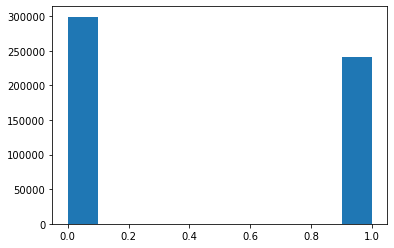

In [129]:
# Get Delay plot which is the main subject of the analysis
plt.hist(airlines_df['Delay'])
plt.show()

### 1. Check airline with the MOST and <b>LEAST<b> Delays

In [130]:
df_airline_count_delay = airlines_df[['Airline', 'Delay']].groupby('Airline').agg('count').reset_index()
df_airline_count_delay = df_airline_count_delay.sort_values(by = 'Delay', ascending = False)
df_airline_count_delay = df_airline_count_delay.reset_index()
df_airline_count_delay.head()

,index,Airline,Delay
0,15,WN,94097
1,5,DL,60940
2,12,OO,50254
3,1,AA,45656
4,10,MQ,36605


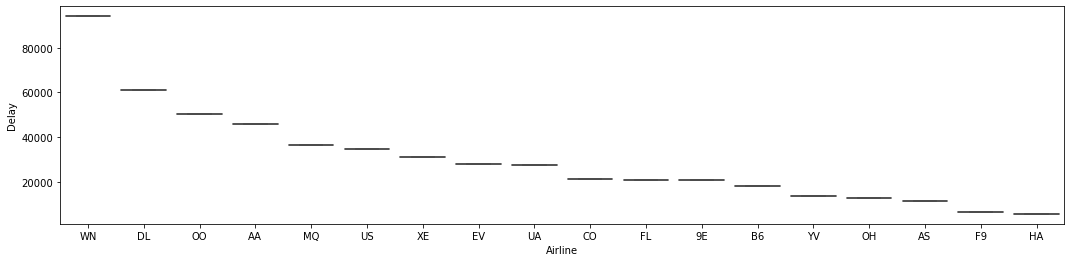

In [131]:
# Present the table above in form of graph
plt.figure(figsize = (18,4))
sns.boxplot(x= 'Airline',y = 'Delay', color = 'blue', 
            data = df_airline_count_delay)
plt.show()

In [132]:
# Inference: Northwest Airlines having the most delays and Hawaiian airlines with least delays.

### 2. Checking the (AirportFrom) which the flight starts from with the most and least delay

In [133]:
df_airportfrom_count_delay = airlines_df[['AirportFrom', 'Delay']].groupby('AirportFrom').agg('count').reset_index()
df_airportfrom_count_delay = df_airportfrom_count_delay.sort_values(by = 'Delay', ascending = False)
df_airportfrom_count_delay = df_airportfrom_count_delay.reset_index()
df_airportfrom_count_delay.head()

,index,AirportFrom,Delay
0,16,ATL,34449
1,208,ORD,24822
2,80,DFW,22154
3,79,DEN,19843
4,154,LAX,16657


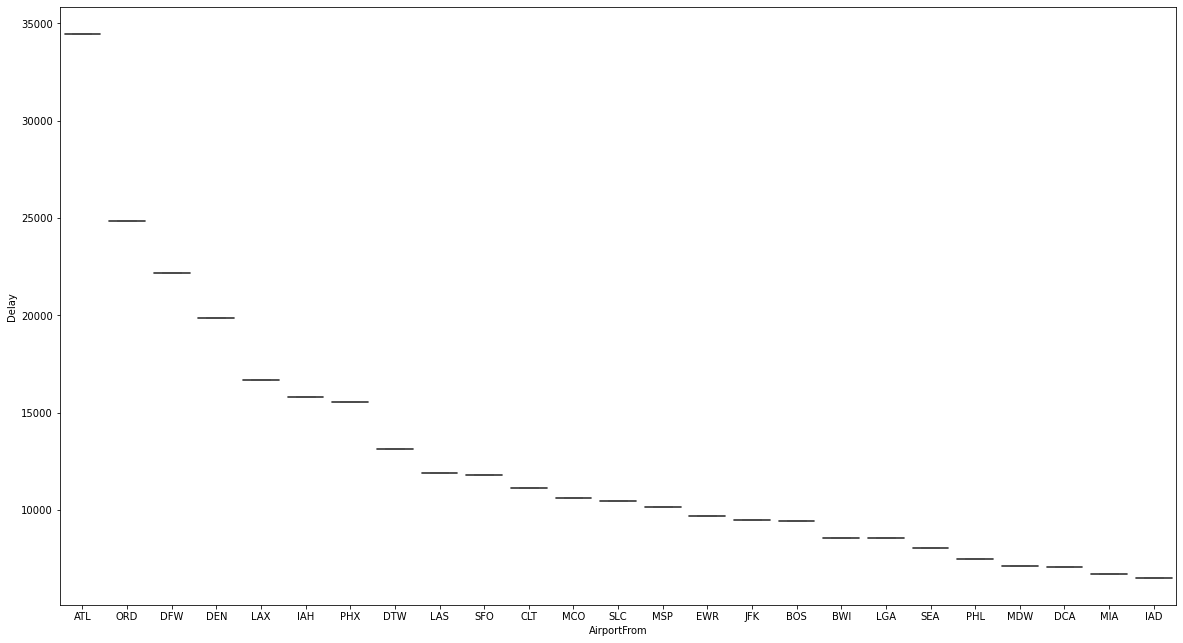

In [134]:
plt.figure(figsize = (20,11))
sns.boxplot(x= 'AirportFrom',y = 'Delay', color = 'blue', 
            data = df_airportfrom_count_delay[:25])
plt.show()

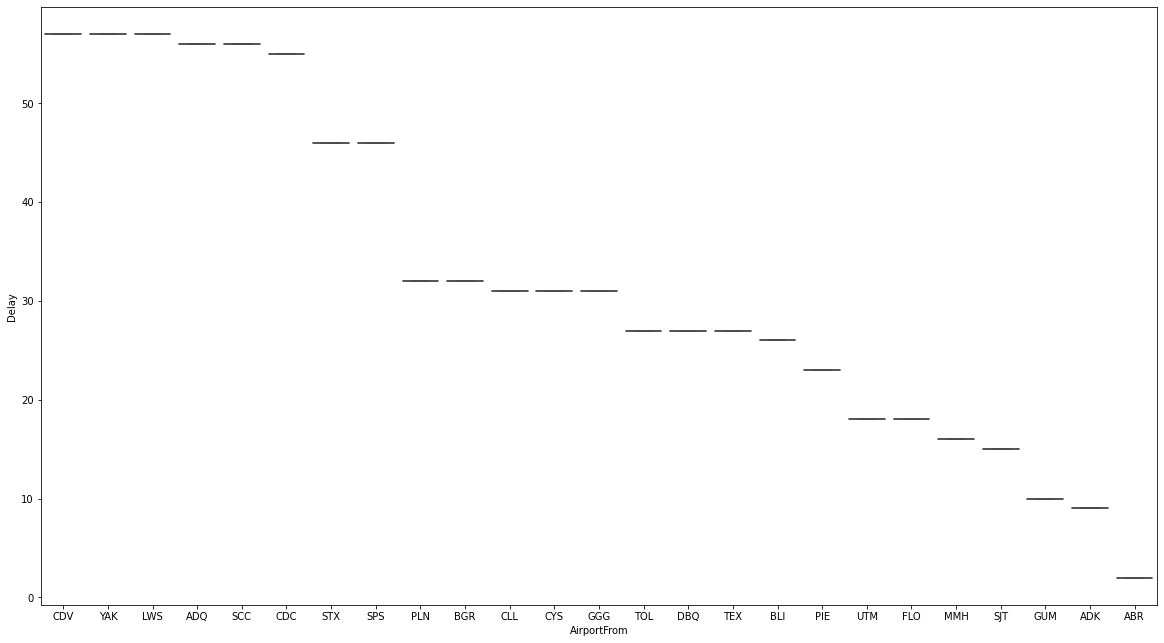

In [135]:
plt.figure(figsize = (20,11))
sns.boxplot(x= 'AirportFrom',y = 'Delay', color = 'blue', 
            data = df_airportfrom_count_delay[-25:])
plt.show()

In [136]:
# Inference: Starts from Hartsfield-Jackson Atlanta International Airport (ATL) having the most delays and Aberdeen Regional Airport (ABR) with least delays.

### 3. Checking (AirportTo) which Airport the flight destination with the most and least delay

In [137]:
df_airportto_count_delay = airlines_df[['AirportTo', 'Delay']].groupby('AirportTo').agg('count').reset_index()
df_airportto_count_delay = df_airportto_count_delay.sort_values(by = 'Delay', ascending = False)
df_airportto_count_delay = df_airportto_count_delay.reset_index()
df_airportto_count_delay.head()

,index,AirportTo,Delay
0,16,ATL,34440
1,208,ORD,24871
2,80,DFW,22153
3,79,DEN,19848
4,154,LAX,16656


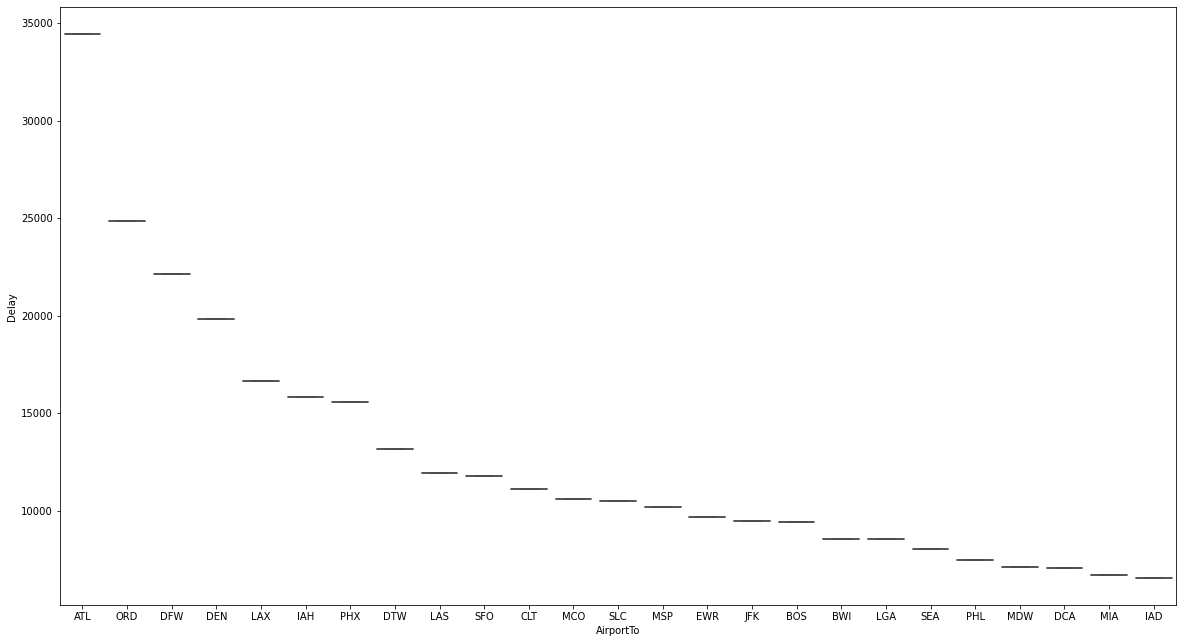

In [138]:
plt.figure(figsize = (20,11))
sns.boxplot(x = 'AirportTo',y = 'Delay', color = 'blue', 
            data = df_airportto_count_delay[:25])
plt.show()

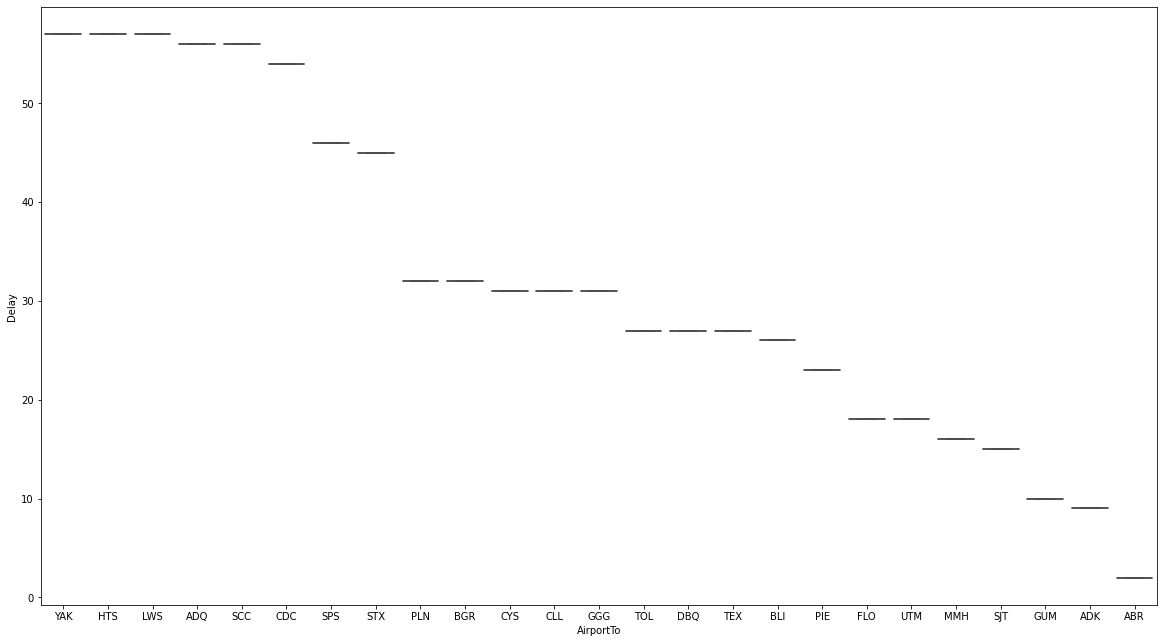

In [139]:
plt.figure(figsize = (20,11))
sns.boxplot(x = 'AirportTo',y = 'Delay', color = 'blue', 
            data = df_airportto_count_delay[-25:])
plt.show()

In [140]:
#inference: Destination to Hartsfield-Jackson Atlanta International Airport (ATL) having the most delays and Aberdeen Regional Airport (ABR) with least delays.

### 4. Checking the day of the week with the MOST and LEAST delay

In [141]:
df_day_count_delay = airlines_df[['DayOfWeek', 'Delay']].groupby('DayOfWeek').agg('count').reset_index()
df_day_count_delay = df_day_count_delay.sort_values(by = 'Delay', ascending = False)
df_day_count_delay = df_day_count_delay.reset_index()
df_day_count_delay.head()

,index,DayOfWeek,Delay
0,3,4,91445
1,2,3,89746
2,4,5,85248
3,0,1,72769
4,1,2,71340


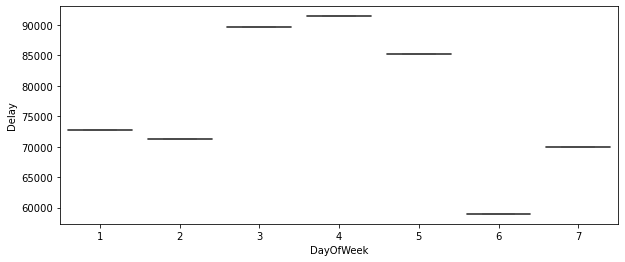

In [142]:
plt.figure(figsize = (10,4))
sns.boxplot(x = 'DayOfWeek',y = 'Delay', color = 'blue', 
            data = df_day_count_delay)
plt.show()

In [143]:
#Inference: Day 4 having the most delays and Day 6 with least delays.

### 5. Checking the route with the MOST and LEAST delay

In [144]:
airlines_df['Route']=airlines_df['AirportFrom']+'-'+airlines_df['AirportTo']

In [145]:
df_route_count_delay = airlines_df[['Route', 'Delay']].groupby('Route').agg('count').reset_index()
df_route_count_delay = df_route_count_delay.sort_values(by = 'Delay', ascending = False)
df_route_count_delay = df_route_count_delay.reset_index()
df_route_count_delay

,index,Route,Delay
0,2204,LAX-SFO,1079
1,3744,SFO-LAX,1077
2,2913,OGG-HNL,982
3,1650,HNL-OGG,951
4,3571,SAN-LAX,935
...,...,...,...
4185,1269,DTW-ICT,1
4186,3336,PIA-MSP,1
4187,1265,DTW-HPN,1
4188,3032,ORD-GEG,1


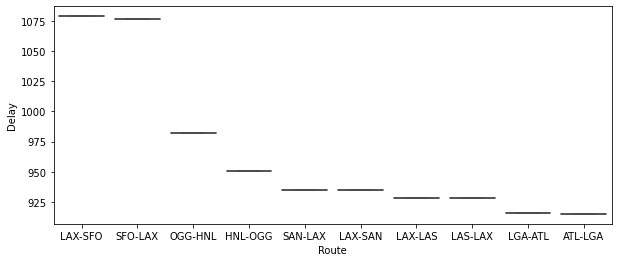

In [146]:
plt.figure(figsize = (10,4))
sns.boxplot(x = 'Route',y = 'Delay', color = 'blue', 
            data = df_route_count_delay[:10])
plt.show()

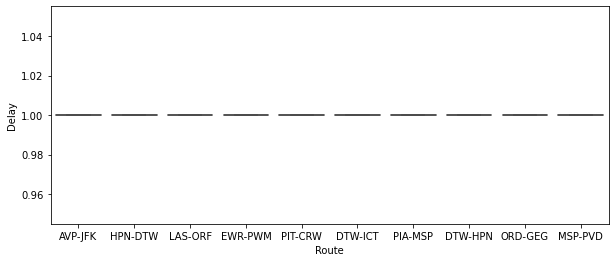

In [147]:
plt.figure(figsize = (10,4))
sns.boxplot(x = 'Route',y = 'Delay', color = 'blue', 
            data = df_route_count_delay[-10:])
plt.show()

In [148]:
#Inference: Los Angeles International Airport - San Francisco International Airport (LAX-SFO) having the most delays and MSP-PVD, ORD-GEG, DTW-HPN with least delays

## Step 3: Split the data into train and test sets

Now we will split our dataset into training and testing sets. The data from our training set will be used to build the model and the data from the test set will be used to validate the model.

We will also drop the Flight column (which shows which type of plane) and id column, as they may pollute our results (feature selection)

In [149]:
# Drop the features Flight and id (They are not really needed for the process to come)
airlines_df = airlines_df.drop(["id","Flight"], axis=1)

airlines_df['DayOfWeek'] = airlines_df["DayOfWeek"].map({1:"Sun", 2:"Mon", 3:"Tues", 4:"Wed", 5:"Thurs", 6:"Fri", 7:"Sat"})

delays = airlines_df["Delay"].to_numpy()

features = airlines_df.drop(['Delay'], axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, delays, test_size=0.5, random_state=42, stratify=delays)

## Step 4: Preprocessing

There are a few data processing steps we need to execute before building our model:
1. Some columns are numeric (int64, float64) and some are non-numeric(object)
2. The numeric data has varying ranges.
3. It's not the case for this dataset, but if there were missing values, we'd have to come up with an interpolation strategy for the empty cells

In [150]:
# Convert the categorical features in the train and test sets independently
# this improves computation time. There are also some models that require strictly numeric format
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# There is need to reindex the columns in case features appeared in the test set that were not in the train set
# set the fill value to 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

## Step 5: Building the ML Model

### Model 1: Logistic Regression

In [151]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(max_iter=1000)
# fit the model
logreg.fit(rescaled_X_train, y_train)

LogisticRegression(max_iter=1000)

In [152]:
y_pred_train = logreg.predict(rescaled_X_train)
y_pred_test = logreg.predict(rescaled_X_test)

print("Accuracy of logistic regression classifier: ",accuracy_score(y_train, y_pred_train))

Accuracy of logistic regression classifier:  0.6629661353178267


### Model 2: Decision Tree

In [153]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [154]:
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

In [155]:
y_pred_train

array([0, 1, 0, ..., 1, 1, 1])

In [156]:
print("Classification Report for Training Dataset")
print("==========================================")
print(classification_report(y_train, y_pred_train))

print("Classification Report for Testing Dataset")
print("==========================================")
print(classification_report(y_test, y_pred_test))

Classification Report for Training Dataset
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    149559
           1       0.95      0.74      0.83    120132

    accuracy                           0.86    269691
   macro avg       0.88      0.85      0.86    269691
weighted avg       0.88      0.86      0.86    269691

Classification Report for Testing Dataset
              precision    recall  f1-score   support

           0       0.63      0.70      0.66    149560
           1       0.57      0.49      0.52    120132

    accuracy                           0.61    269692
   macro avg       0.60      0.59      0.59    269692
weighted avg       0.60      0.61      0.60    269692



In [157]:
# Two algorithms were used to build the model, and it was discovered that Logistic Regression has better accuracy